In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [2]:
df     = pd.read_csv('UTU/data/lcss2.csv')

In [3]:
df.insert(0, "id", range(1, len(df) + 1))

In [4]:
df

,id,PatientID,Hospital,CLP_Level,Age,Gender,Appetite_Score,Fatigue_Score,Coughing_Score,ShortBreath_Score,BloodSputum_Score,Pain_Score,LungCancerSymptom_Score,ImpactActivity_Score,QoL_Score
0,1,P00001,0,5.822046,45,Female,3,2,2,3,2,2,3,3,1
1,2,P00002,1,132.864556,42,Female,3,5,5,5,4,4,5,3,5
2,3,P00003,1,2.182114,34,Male,5,5,5,4,3,3,4,5,3
3,4,P00004,1,65.599962,27,Male,4,5,5,5,3,3,3,5,3
4,5,P00005,0,2.503224,48,Female,1,1,2,2,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,P27996,0,0.658478,25,Female,3,2,2,3,1,2,2,3,1
27996,27997,P27997,1,3.947854,44,Female,4,4,3,4,5,3,3,4,4
27997,27998,P27998,0,4.367072,50,Male,1,2,2,3,2,1,1,1,2
27998,27999,P27999,0,5.118272,41,Male,1,1,1,3,2,1,1,2,2


In [5]:
df = df[df["CLP_Level"] < 7]

In [6]:
df = df.drop(columns=["Age", "Gender","PatientID"])

In [7]:
df

,id,Hospital,CLP_Level,Appetite_Score,Fatigue_Score,Coughing_Score,ShortBreath_Score,BloodSputum_Score,Pain_Score,LungCancerSymptom_Score,ImpactActivity_Score,QoL_Score
0,1,0,5.822046,3,2,2,3,2,2,3,3,1
2,3,1,2.182114,5,5,5,4,3,3,4,5,3
4,5,0,2.503224,1,1,2,2,1,1,1,2,2
5,6,0,4.366184,2,2,1,3,2,3,3,1,2
7,8,1,5.596748,3,4,3,5,3,5,3,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,0,0.658478,3,2,2,3,1,2,2,3,1
27996,27997,1,3.947854,4,4,3,4,5,3,3,4,4
27997,27998,0,4.367072,1,2,2,3,2,1,1,1,2
27998,27999,0,5.118272,1,1,1,3,2,1,1,2,2


## Split

In [8]:
X = df.drop(columns=["id", "Hospital"])
y = df["Hospital"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [12]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: Hospital
1    10174
0     9986
Name: count, dtype: int64
After SMOTE: Hospital
1    10174
0    10174
Name: count, dtype: int64


# Models

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

In [14]:
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Train models on scaled data
for name, model in models.items():
    model.fit(X_train_res_scaled, y_train_res)
    y_pred = model.predict(X_test_scaled)
    print(name, classification_report(y_test, y_pred))

Logistic Regression               precision    recall  f1-score   support

           0       0.97      0.98      0.97      2496
           1       0.98      0.97      0.97      2544

    accuracy                           0.97      5040
   macro avg       0.97      0.97      0.97      5040
weighted avg       0.97      0.97      0.97      5040

Decision Tree               precision    recall  f1-score   support

           0       0.93      0.94      0.93      2496
           1       0.94      0.93      0.94      2544

    accuracy                           0.94      5040
   macro avg       0.94      0.94      0.94      5040
weighted avg       0.94      0.94      0.94      5040

Random Forest               precision    recall  f1-score   support

           0       0.97      0.98      0.97      2496
           1       0.98      0.97      0.97      2544

    accuracy                           0.97      5040
   macro avg       0.97      0.97      0.97      5040
weighted avg       0.97   

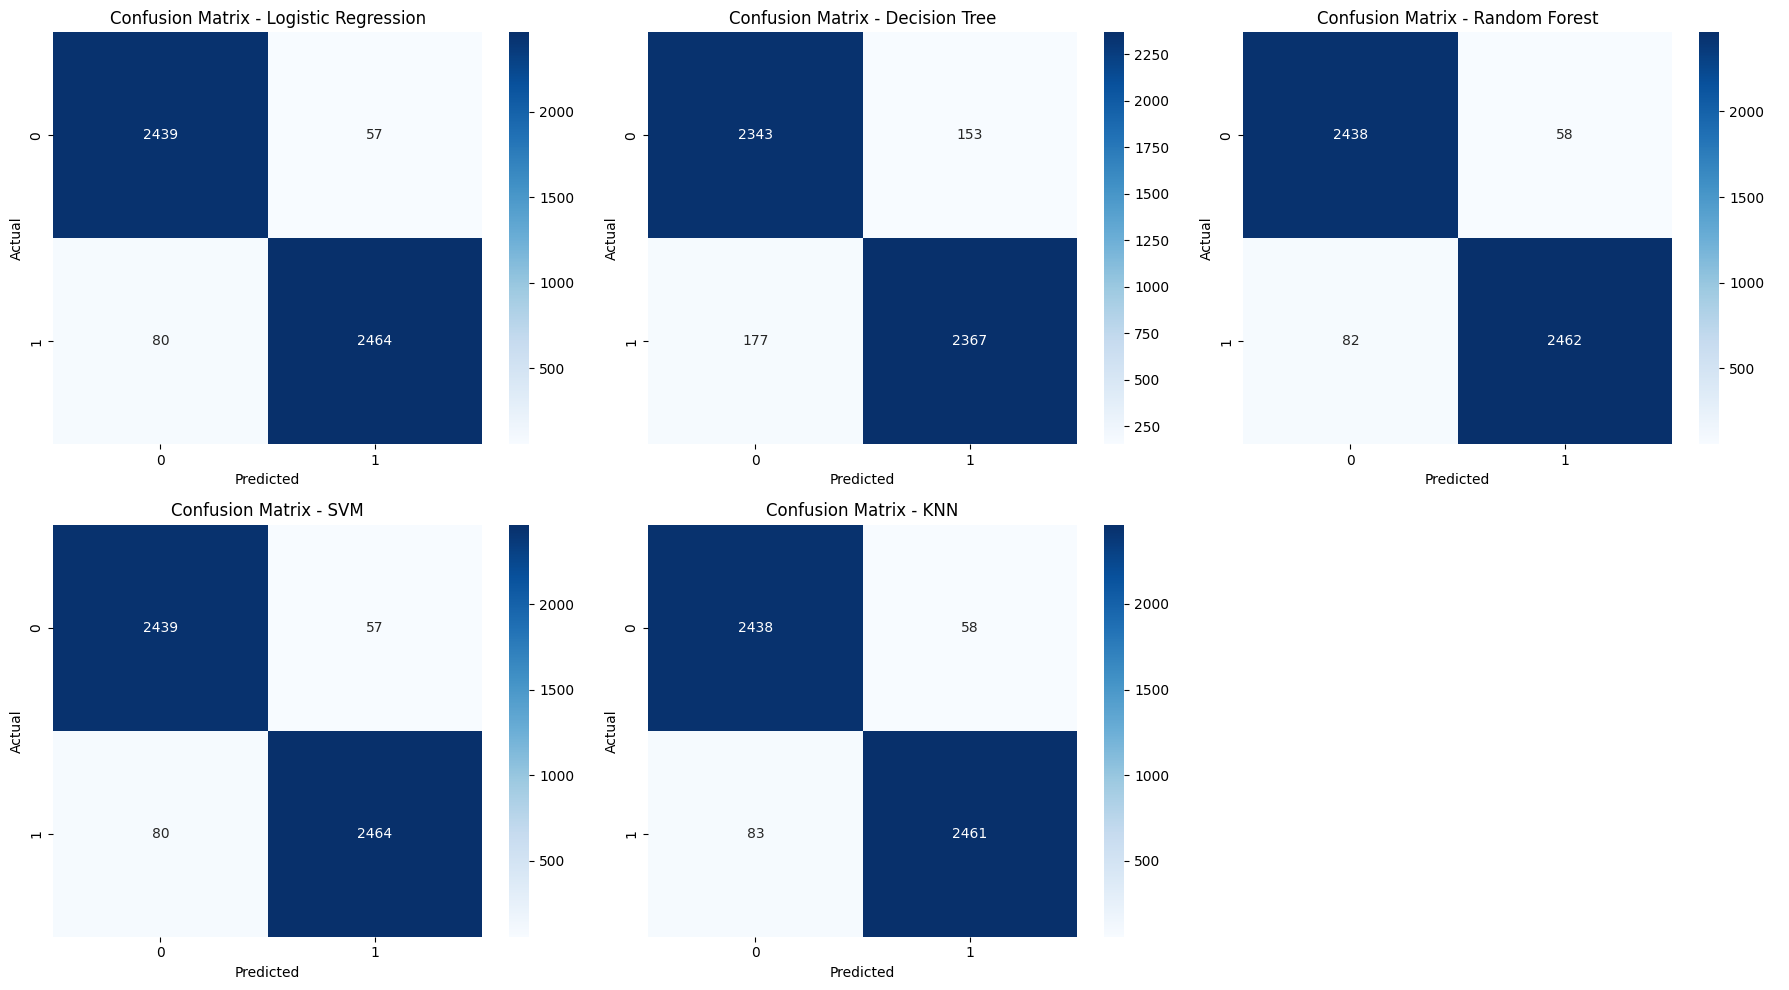

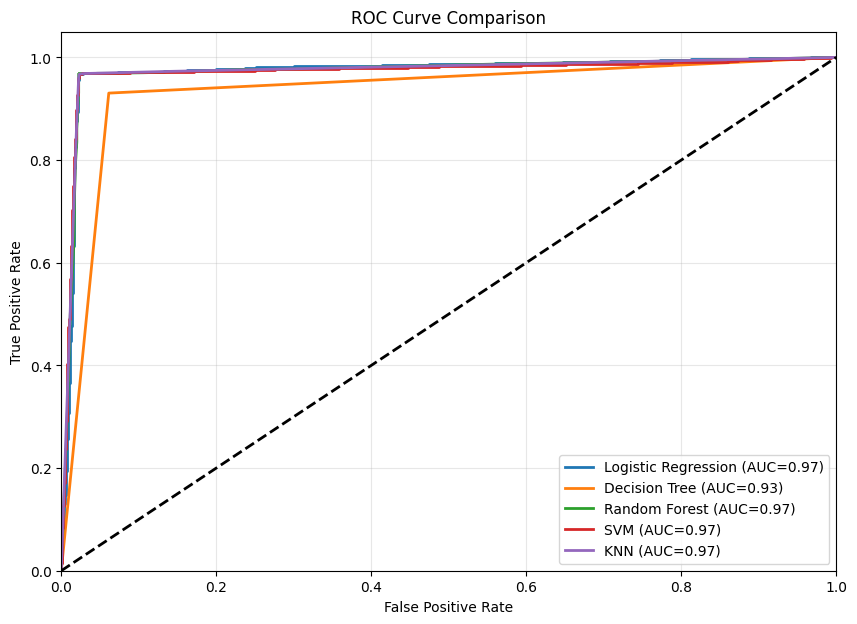

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# --- Confusion Matrix ---
fig_cm, axes_cm = plt.subplots(2, 3, figsize=(18, 10))
axes_cm = axes_cm.flatten()

plt.figure(figsize=(10, 7))

for i, (name, model) in enumerate(models.items()):
    # Train & predict
    model.fit(X_train_res_scaled, y_train_res)
    y_pred = model.predict(X_test_scaled)
    
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = model.decision_function(X_test_scaled)

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes_cm[i])
    axes_cm[i].set_title(f"Confusion Matrix - {name}")
    axes_cm[i].set_xlabel("Predicted")
    axes_cm[i].set_ylabel("Actual")

    # --- ROC Curve ---
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={roc_auc:.2f})")

for j in range(len(models), len(axes_cm)):
    axes_cm[j].axis("off")

fig_cm.tight_layout()

# ROC curve layout
plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [16]:
from sklearn.linear_model import LogisticRegression
import joblib

# --- pilih best model ---
best_model = LogisticRegression(max_iter=1000, random_state=42)
best_model.fit(X_train_res_scaled, y_train_res)

# --- simpan model + scaler ---
joblib.dump(best_model, "lcss_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model & scaler berhasil disimpan.")

✅ Model & scaler berhasil disimpan.
